In [3]:
import pandas as pd

# chunksize = 100000  # read 100k rows at a time
# input_file = "household_power_consumption.txt"
# output_file = "electricity_data.csv"

# # Read the first chunk and write headers
# first_chunk = True

# for chunk in pd.read_csv(input_file, sep=";", chunksize=chunksize, low_memory=False):
#     # Append each chunk to CSV file
#     chunk.to_csv(output_file, index=False, mode='a', header=first_chunk)
#     first_chunk = False

# print("✅ Conversion completed successfully in chunks!")


In [4]:
df = pd.read_csv("electricity_data.csv")


C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_16184\1926985769.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("electricity_data.csv")


In [5]:
df.shape
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
import numpy as np
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [9]:
# Convert numeric columns to float
cols_to_convert = [
    'Global_active_power', 
    'Global_reactive_power', 
    'Voltage', 
    'Global_intensity', 
    'Sub_metering_1', 
    'Sub_metering_2', 
    'Sub_metering_3'
]

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 158.3+ MB


In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN


In [12]:
# +1.0 Positive Correlation (One increase other increase)
# 0  No correlation betwen variables
# -1.0 Perfect Negative Correlation  (One increase other decrease)

df[['Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


<Axes: >

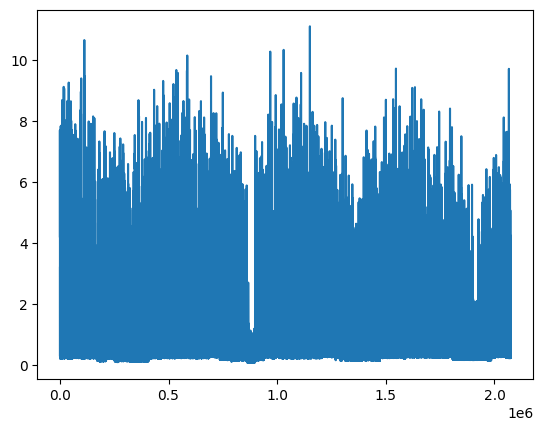

In [13]:
df['Global_active_power'].plot()

<Axes: >

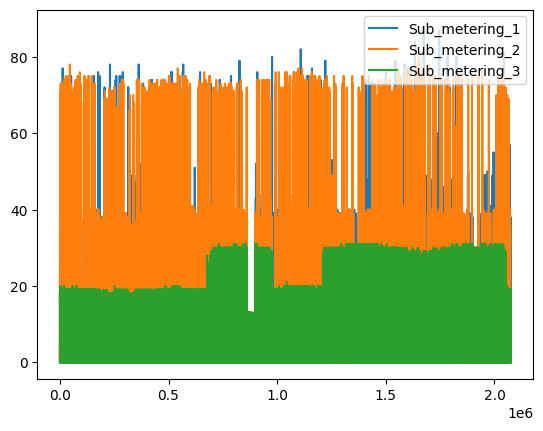

In [14]:
df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].plot()

In [15]:
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)} outliers found")

# Example usage
detect_outliers_iqr(df)


Global_active_power: 94907 outliers found
Global_reactive_power: 40420 outliers found
Voltage: 51067 outliers found
Global_intensity: 100961 outliers found
Sub_metering_1: 169105 outliers found
Sub_metering_2: 77151 outliers found
Sub_metering_3: 0 outliers found


In [16]:
# 'Sub_metering_3: skew = 0.72 → Right skew → Suggest **MEDIAN**'
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())
df['Sub_metering_3'].isnull().sum()

np.int64(0)

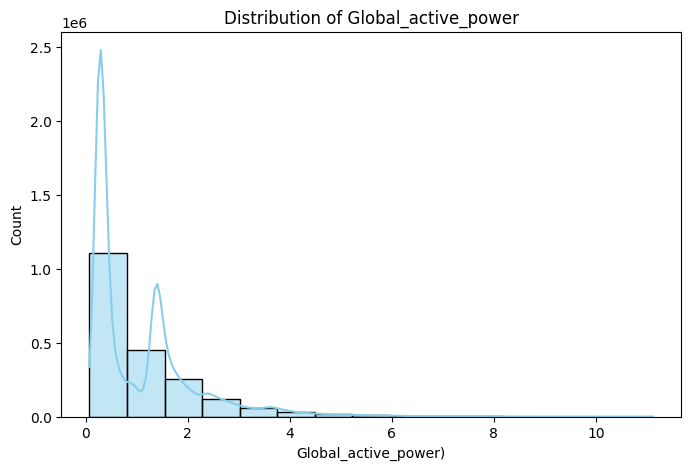

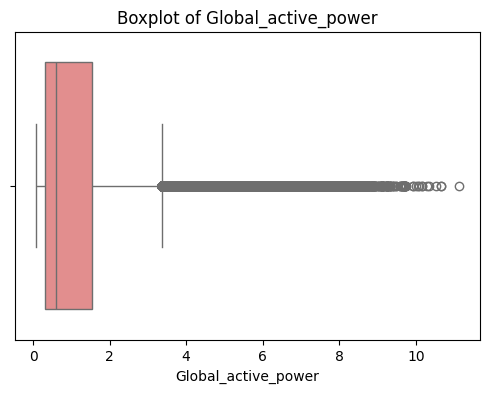

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["Global_active_power"], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Global_active_power")
plt.xlabel("Global_active_power)")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Global_active_power"], color="lightcoral")
plt.title("Boxplot of Global_active_power")
plt.xlabel("Global_active_power")
plt.show()


In [18]:
# Example: delete one or more columns
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [19]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns (exclude Datetime)
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [20]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek


In [21]:
# Create lag features for forecasting (example for last 3 mint)
df['lag_1'] = df['Global_active_power'].shift(1) # one mint ago
df['lag_2'] = df['Global_active_power'].shift(2) # two mint ago
df['lag_3'] = df['Global_active_power'].shift(3) # three mint ago


In [22]:
df.dropna(inplace=True)

In [23]:
# Drop datetime column because ML models can’t handle datetime directly
X = df.drop(['Datetime', 'Global_active_power'], axis=1)
y = df['Global_active_power']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # no shuffle for time series
)


In [25]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)


from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 0.01507375051350753
MSE: 0.0007026984036082646
R²: 0.9991247120208301


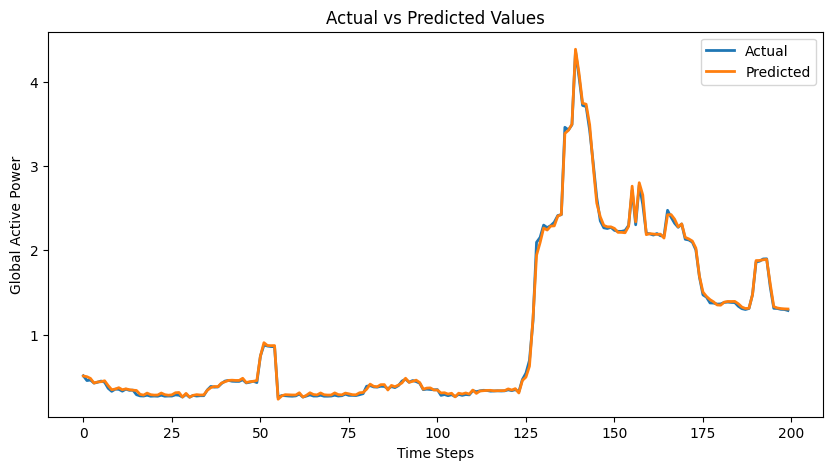

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:200], label='Actual', linewidth=2)
plt.plot(y_pred[:200], label='Predicted', linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()


In [29]:
import pandas as pd

# Example latest known values (must match the model’s training feature columns)
latest_values = {
    'Global_reactive_power': 0.418,
    'Voltage': 234.84,
    'Global_intensity': 18.4,
    'Sub_metering_1': 0.0,
    'Sub_metering_2': 1.0,
    'Sub_metering_3': 17.0,
    'year': 2006,
    'month': 12,
    'day': 16,
    'hour': 17,
    'day_of_week': 5,
    'lag_1': 4.216,
    'lag_2': 5.360,
    'lag_3': 5.374
}

# Create DataFrame in same feature order as training data
X_future = pd.DataFrame([latest_values])[X_train.columns]

# Predict next-minute Global Active Power
next_power = xgb_model.predict(X_future)[0]

print(f"Predicted Global Active Power (next minute): {next_power}")


Predicted Global Active Power (next minute): 4.295149803161621


In [30]:
import pandas as pd

# Start from last known record
latest_values = {
    'Global_reactive_power': 0.418,
    'Voltage': 234.84,
    'Global_intensity': 18.4,
    'Sub_metering_1': 0.0,
    'Sub_metering_2': 1.0,
    'Sub_metering_3': 17.0,
    'year': 2010,
    'month': 11,
    'day': 26,
    'hour': 21,
    'day_of_week': 4,
    'lag_1': 4.216,
    'lag_2': 5.360,
    'lag_3': 5.374
}

# Convert to DataFrame
future_df = pd.DataFrame([latest_values])[X_train.columns]

# Store future predictions
future_preds = []

# Predict next 30 minutes
for i in range(30):
    pred = xgb_model.predict(future_df)[0]
    future_preds.append(pred)

    # Update lag values for next step
    future_df['lag_3'] = future_df['lag_2']
    future_df['lag_2'] = future_df['lag_1']
    future_df['lag_1'] = pred

    # Update time features (+1 minute)
    dt = pd.Timestamp(
        year = int(future_df['year'].iloc[0]),
        month = int(future_df['month'].iloc[0]),
        day = int(future_df['day'].iloc[0]),
        hour = int(future_df['hour'].iloc[0])

    )
    dt = dt + pd.Timedelta(minutes=1)
    future_df['year'] = dt.year
    future_df['month'] = dt.month
    future_df['day'] = dt.day
    future_df['hour'] = dt.hour
    future_df['day_of_week'] = dt.dayofweek

# Combine results with timestamps
start_time = pd.Timestamp("2010-11-26 21:03:00")
timestamps = [start_time + pd.Timedelta(minutes=i) for i in range(30)]
future_results = pd.DataFrame({'timestamp': timestamps, 'Predicted_Power': future_preds})

print(future_results)


             timestamp  Predicted_Power
0  2010-11-26 21:03:00         4.303576
1  2010-11-26 21:04:00         4.320451
2  2010-11-26 21:05:00         4.319909
3  2010-11-26 21:06:00         4.319909
4  2010-11-26 21:07:00         4.319909
5  2010-11-26 21:08:00         4.319909
6  2010-11-26 21:09:00         4.319909
7  2010-11-26 21:10:00         4.319909
8  2010-11-26 21:11:00         4.319909
9  2010-11-26 21:12:00         4.319909
10 2010-11-26 21:13:00         4.319909
11 2010-11-26 21:14:00         4.319909
12 2010-11-26 21:15:00         4.319909
13 2010-11-26 21:16:00         4.319909
14 2010-11-26 21:17:00         4.319909
15 2010-11-26 21:18:00         4.319909
16 2010-11-26 21:19:00         4.319909
17 2010-11-26 21:20:00         4.319909
18 2010-11-26 21:21:00         4.319909
19 2010-11-26 21:22:00         4.319909
20 2010-11-26 21:23:00         4.319909
21 2010-11-26 21:24:00         4.319909
22 2010-11-26 21:25:00         4.319909
23 2010-11-26 21:26:00         4.319909


In [31]:
import joblib
joblib.dump(xgb_model, "Electricity_consumption_model.pkl")

['Electricity_consumption_model.pkl']

In [32]:
# Load your trained model
model = joblib.load("Electricity_consumption_model.pkl")

In [33]:
import pandas as pd

# Start from last known record
latest_values = {
    'Global_reactive_power': 0.418,
    'Voltage': 234.84,
    'Global_intensity': 18.4,
    'Sub_metering_1': 0.0,
    'Sub_metering_2': 1.0,
    'Sub_metering_3': 17.0,
    'year': 2010,
    'month': 11,
    'day': 26,
    'hour': 21,
    'day_of_week': 4,
    'lag_1': 4.216,
    'lag_2': 5.360,
    'lag_3': 5.374
}

# Convert to DataFrame
future_df = pd.DataFrame([latest_values])[X_train.columns]

# Store future predictions
future_preds = []

# Predict next 30 minutes
for i in range(30):
    pred = model.predict(future_df)[0]
    future_preds.append(pred)

    # Update lag values for next step
    future_df['lag_3'] = future_df['lag_2']
    future_df['lag_2'] = future_df['lag_1']
    future_df['lag_1'] = pred

    # Update time features (+1 minute)
    dt = pd.Timestamp(
        year = int(future_df['year'].iloc[0]),
        month = int(future_df['month'].iloc[0]),
        day = int(future_df['day'].iloc[0]),
        hour = int(future_df['hour'].iloc[0])

    )
    dt = dt + pd.Timedelta(minutes=1)
    future_df['year'] = dt.year
    future_df['month'] = dt.month
    future_df['day'] = dt.day
    future_df['hour'] = dt.hour
    future_df['day_of_week'] = dt.dayofweek

# Combine results with timestamps
start_time = pd.Timestamp("2010-11-26 21:03:00")
timestamps = [start_time + pd.Timedelta(minutes=i) for i in range(30)]
future_results = pd.DataFrame({'timestamp': timestamps, 'Predicted_Power': future_preds})

print(future_results)


             timestamp  Predicted_Power
0  2010-11-26 21:03:00         4.303576
1  2010-11-26 21:04:00         4.320451
2  2010-11-26 21:05:00         4.319909
3  2010-11-26 21:06:00         4.319909
4  2010-11-26 21:07:00         4.319909
5  2010-11-26 21:08:00         4.319909
6  2010-11-26 21:09:00         4.319909
7  2010-11-26 21:10:00         4.319909
8  2010-11-26 21:11:00         4.319909
9  2010-11-26 21:12:00         4.319909
10 2010-11-26 21:13:00         4.319909
11 2010-11-26 21:14:00         4.319909
12 2010-11-26 21:15:00         4.319909
13 2010-11-26 21:16:00         4.319909
14 2010-11-26 21:17:00         4.319909
15 2010-11-26 21:18:00         4.319909
16 2010-11-26 21:19:00         4.319909
17 2010-11-26 21:20:00         4.319909
18 2010-11-26 21:21:00         4.319909
19 2010-11-26 21:22:00         4.319909
20 2010-11-26 21:23:00         4.319909
21 2010-11-26 21:24:00         4.319909
22 2010-11-26 21:25:00         4.319909
23 2010-11-26 21:26:00         4.319909


In [ ]:
# Get help from this chat
# https://chat.deepseek.com/a/chat/s/b106a172-b954-481b-bed7-a893c7365475